# RESERVOIR WATER LEVEL PREDICTIVE MODELLING OF HARANGI RESERVOIR,KARNATAKA.

The dataset is Harangi_mod.csv.
In there the column 'STORAGE_CONSD_IN_OUT' is a calculated column in TMC. It is calculated by the formula (PRESENT_STORAGE_TMC*9505x10^5+INFLOW_CUSECS-OUTFLOW_CUSECS)/9504X10^5. The factor 9504x10^5 is the multiplication factor of converting TMC to CUSECS.
For Harangi Reservoir the MDDL(minimum drawn down level) is 2788.66 FT. 
GROSS-STORAGE=8.50 TMC
DEAD-STORAGE=0.427 TMC

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from sklearn.model_selection import train_test_split
import datetime as dt
import seaborn as sns
data=pd.read_csv('Harangi_mod.csv')
#data.drop('UNIQUE_KEY',axis=1,inplace=True)
data.drop('Reservoir',axis=1,inplace=True)
data=data.dropna()
data=data.reset_index(drop=True)
data.head()

,YEAR,WEEK,FLOW_DATE,PRESENT_TORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUSECS,STORAGE_CONSD_IN_OUT
0,2011,1,01-01-2011,3.74,2835.90,142.0,0.0,3.740000149
1,2011,1,02-01-2011,3.76,2836.09,239.0,0.0,3.760000251
2,2011,1,03-01-2011,3.77,2836.22,166.0,0.0,3.770000175
3,2011,1,04-01-2011,3.78,2836.31,118.0,0.0,3.780000124
4,2011,1,05-01-2011,3.79,2836.41,130.0,0.0,3.790000137


In [25]:
data['RES_LEVEL_FT'] = pd.to_numeric(data['RES_LEVEL_FT'], errors='coerce')
data['INFLOW_CUSECS'] = pd.to_numeric(data['INFLOW_CUSECS'], errors='coerce')
data['OUTFLOW_CUSECS'] = pd.to_numeric(data['OUTFLOW_CUSECS'], errors='coerce')
data['STORAGE_CONSD_IN_OUT']=pd.to_numeric(data['STORAGE_CONSD_IN_OUT'],errors='coerce')
data.dtypes

YEAR                      int64
WEEK                      int64
FLOW_DATE                object
PRESENT_TORAGE_TMC      float64
RES_LEVEL_FT            float64
INFLOW_CUSECS           float64
OUTFLOW_CUSECS          float64
STORAGE_CONSD_IN_OUT    float64
dtype: object

WEEK-WISE plot of RESERVOIR WATER LEVEL in FT DIVIDED into subplots according to years.

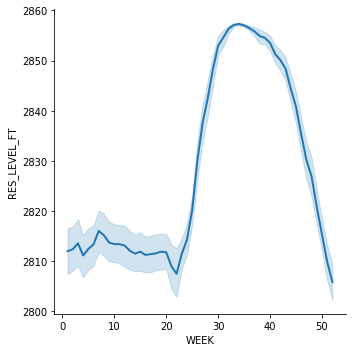

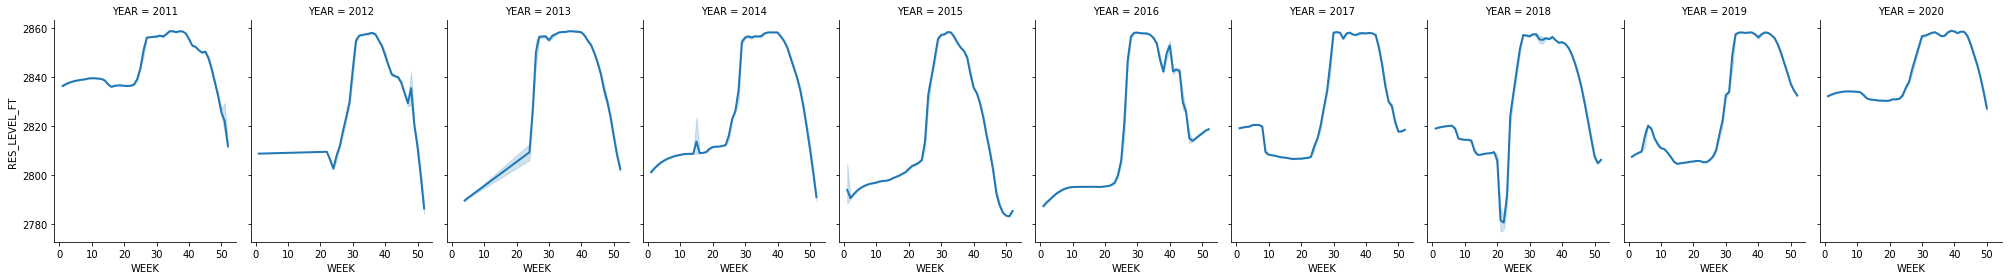

In [26]:
g=sns.relplot(data=data,x="WEEK",y="RES_LEVEL_FT",kind="line",linewidth=2)
g1=sns.relplot(data=data,x="WEEK",y="RES_LEVEL_FT",kind="line",linewidth=2,col="YEAR",height=4,aspect=0.7)

WEEK-WISE plot of RESERVOIR WATER LEVEL in FT DIVIDED into subplots according to years.

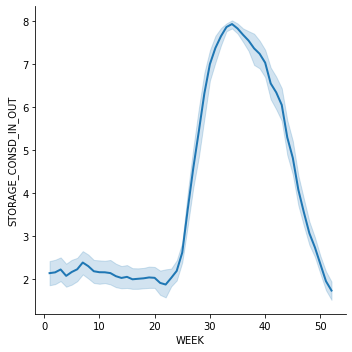

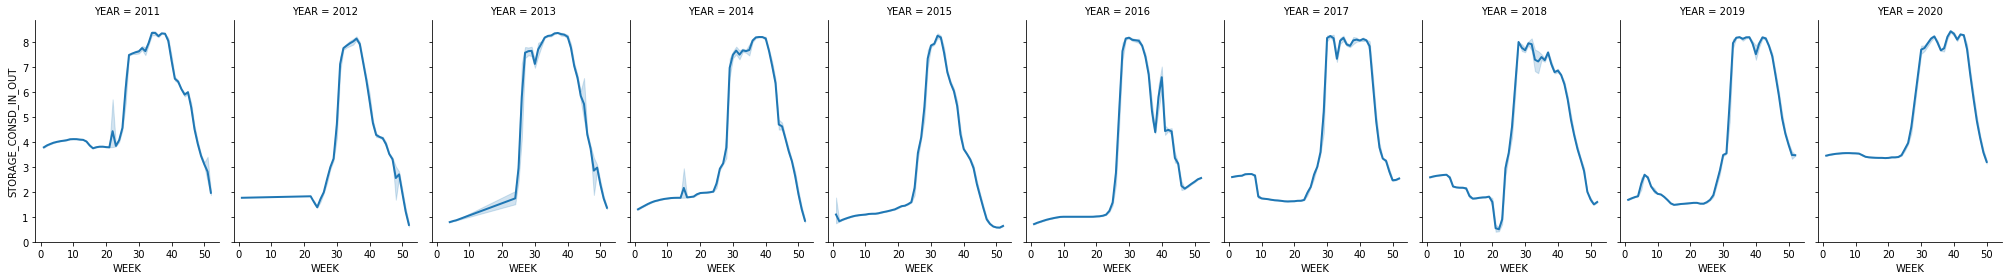

In [27]:
g=sns.relplot(data=data,x="WEEK",y="STORAGE_CONSD_IN_OUT",kind="line",linewidth=2)
g1=sns.relplot(data=data,x="WEEK",y="STORAGE_CONSD_IN_OUT",kind="line",linewidth=2,col="YEAR",height=4,aspect=0.7)

LINE PLOT OF RESERVOIR WATER LEVEL with YEAR

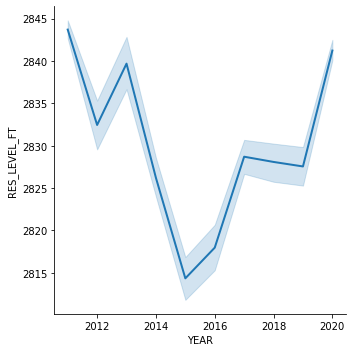

In [28]:
sns.relplot(data=data,x="YEAR",y="RES_LEVEL_FT",kind="line",linewidth=2)

INDEXING THE DATASET with FLOW_DATE

In [29]:
data['FLOW_DATE']=pd.to_datetime(data['FLOW_DATE'], infer_datetime_format=True)
data['FLOW_DATE']=data['FLOW_DATE'].map(dt.datetime.toordinal)
indexDataset = data.set_index(['FLOW_DATE'])
indexDataset.head()

,YEAR,WEEK,PRESENT_TORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUSECS,STORAGE_CONSD_IN_OUT
FLOW_DATE,,,,,,,
734138,2011,1,3.74,2835.90,142.0,0.0,3.74
734169,2011,1,3.76,2836.09,239.0,0.0,3.76
734197,2011,1,3.77,2836.22,166.0,0.0,3.77
734228,2011,1,3.78,2836.31,118.0,0.0,3.78
734258,2011,1,3.79,2836.41,130.0,0.0,3.79


MAKING THE DATASET STATIONARY

In [30]:
indexDataset.shift(1)
indexed_diff = indexDataset.diff(periods=1)
indexed_diff = indexed_diff[1:]
indexed_diff.head() 

,YEAR,WEEK,PRESENT_TORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUSECS,STORAGE_CONSD_IN_OUT
FLOW_DATE,,,,,,,
734169,0.0,0.0,0.02,0.19,97.0,0.0,0.02
734197,0.0,0.0,0.01,0.13,-73.0,0.0,0.01
734228,0.0,0.0,0.01,0.09,-48.0,0.0,0.01
734258,0.0,0.0,0.01,0.10,12.0,0.0,0.01
734289,0.0,0.0,0.02,0.13,37.0,0.0,0.02


PLOT OF THE STATIONARY DATASET'S STORAGE_CONSD_IN_OUT

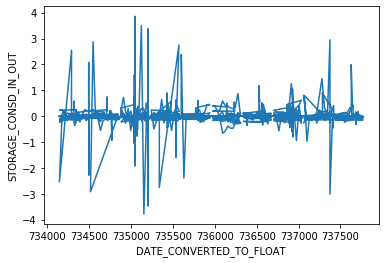

In [31]:
plt.xlabel("DATE_CONVERTED_TO_FLOAT")
plt.ylabel("STORAGE_CONSD_IN_OUT")
plt.plot(indexed_diff['STORAGE_CONSD_IN_OUT'])

AR MODEL PREDICTION 

In [32]:
from sklearn.model_selection import train_test_split 
X = indexed_diff['STORAGE_CONSD_IN_OUT'].values
train = X[0:2660]# train data
test = X[2660:]                 
predictions = []
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

C:\Users\Shramana Batabyal\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Future

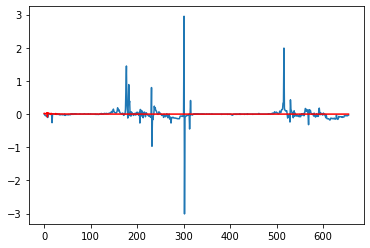

In [33]:
predictions = model_ar_fit.predict(start=2660,end=3315)
plt.plot(test)
plt.plot(predictions,color='red')

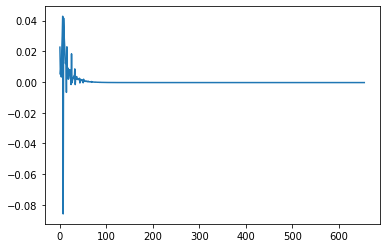

In [34]:
plt.plot(predictions)

In [35]:
mean_squared_error(test,predictions)

0.04676790431862311

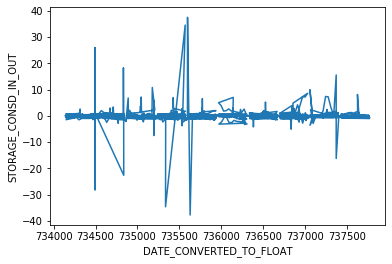

In [36]:
plt.xlabel("DATE_CONVERTED_TO_FLOAT")
plt.ylabel("STORAGE_CONSD_IN_OUT")
plt.plot(indexed_diff['RES_LEVEL_FT'])

C:\Users\Shramana Batabyal\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Future

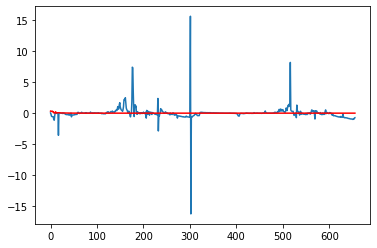

In [37]:
from sklearn.model_selection import train_test_split 
X = indexed_diff['RES_LEVEL_FT'].values
train = X[0:2660]# train data
test = X[2660:]                 
predictions = []
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)
predictions = model_ar_fit.predict(start=2660,end=3315)
plt.plot(test)
plt.plot(predictions,color='red')

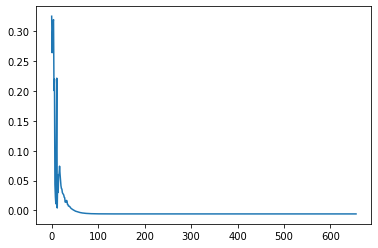

In [38]:
plt.plot(predictions)

In [39]:
mean_squared_error(test,predictions)

1.2779268049610515